In [10]:
import numpy as np
from numpy import ma
import math
import scipy
import os
from IPython.display import Image

from netCDF4 import Dataset
import pandas as pd

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [24]:
days = np.arange(1,32,1)

FILEDIR1    = '/n/home12/hongwei/HONGWEI/GC_run_13.0/Final_simulation_continuous_injection/Sensitive_test/Initial_plume_length/gc_2x25_lagrange_1km'

df10_number = pd.read_fwf(FILEDIR1+'/Plume_number.txt', header=None)
Num1_plume = df10_number.loc[:,3]
Num1_2D = df10_number.loc[:,1]
Num1_1D = df10_number.loc[:,0]
Num1_dissolved = df10_number.loc[:,2]



df10_life   = pd.read_fwf(FILEDIR1+'/Plume_lifetime_seconds.txt', header=None)
df10_life.columns =['Day', 'Transfer_type', 'Lifetime_s','Background_Concnt']

num_30day = 470933

# select first 30 days for lifetime
df10_life_1mon = df10_life.loc[0:num_30day,:]
lifetime1 = df10_life_1mon['Lifetime_s']/(3600*24)
Bgd_Concnt = df10_life_1mon['Background_Concnt']


In [25]:
df10_life_1mon['Transfer_type'].value_counts()


11    467645
22      2137
44      1152
Name: Transfer_type, dtype: int64

In [26]:
# Num1_plume[0:200]

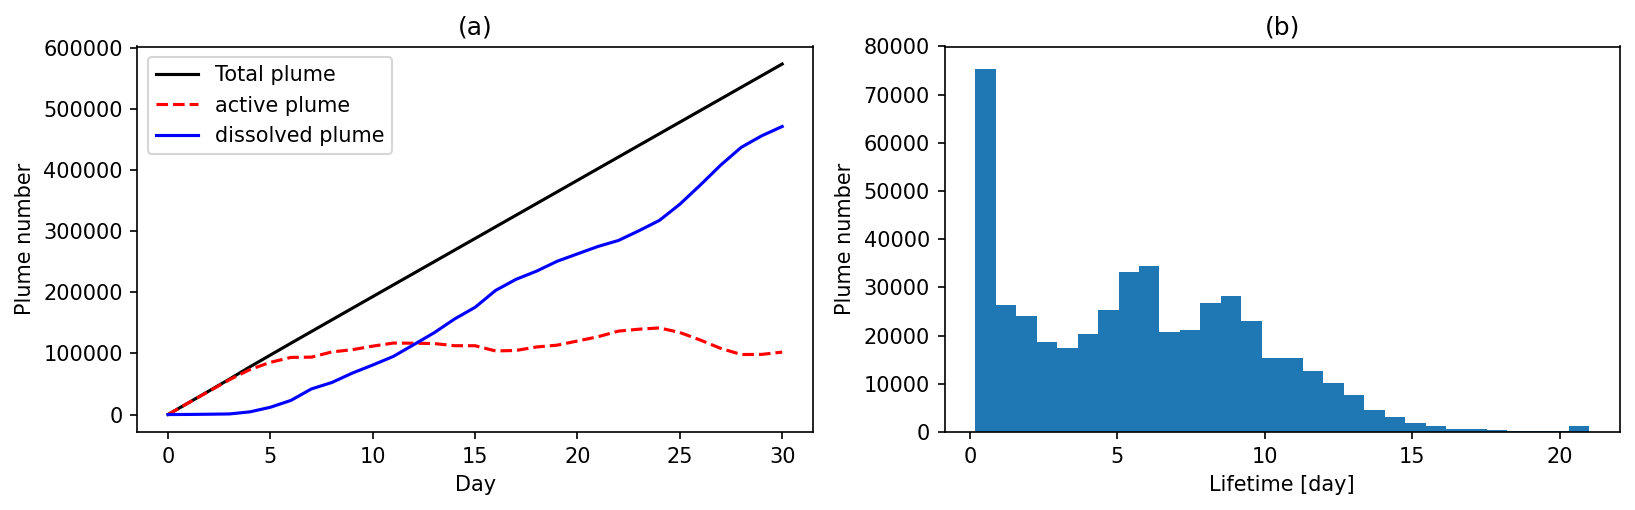

In [27]:
fig = plt.figure(figsize=(11,3.5), dpi=150);

# (1)
Nt = 31
ax1 = fig.add_subplot(1,2,1)
ax1.plot(Num1_plume[0:Nt], 'k', label='Total plume')
ax1.plot(Num1_1D[0:Nt]+Num1_2D[0:Nt], 'r--', label='active plume')
ax1.plot(Num1_dissolved[0:Nt], 'b', label='dissolved plume')
ax1.legend()

ax1.set_title('(a)', fontsize=12, loc='center')
# plt.title('Number of plumes in different types', fontsize=12)
ax1.set_xlabel('Day');
ax1.set_ylabel('Plume number');

# (2)
# delete all the lifetime that is less than 0.5 day ???
# log scale ???
ax2 = fig.add_subplot(1,2,2)
max_num = 0.8e5

ax2.hist(lifetime1, bins=30)
ax2.set_ylim(0,max_num)

ax2.set_xlabel('Lifetime [day]');
ax2.set_ylabel('Plume number');
ax2.set_title('(b)',fontsize=12, loc='center');
# plt.title('Distribution of plume lifetime in plume model', fontsize=12);

plt.tight_layout()

In [28]:
print(f'The average lifetime is {np.mean(lifetime1):0.1f} days')

The average lifetime is 5.8 days


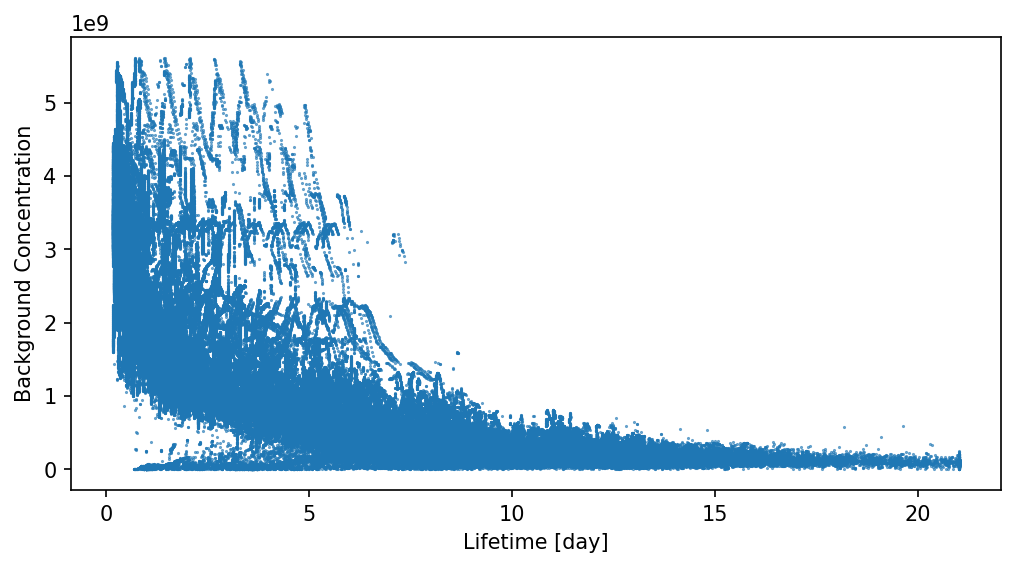

In [41]:
# check for short-lifetime transferred plume segment
fig = plt.figure(figsize=(8,4), dpi=150)
plt.plot(lifetime1, Bgd_Concnt, '.', markersize=1, alpha=0.7)
plt.xlabel('Lifetime [day]')
plt.ylabel('Background Concentration');